In [5]:
import numpy as np

def parse_line(ndjson_line):
    """Parse an ndjson line and return ink (as np array) and classname."""
    sample = json.loads(ndjson_line)
    class_name = sample["word"]
    inkarray = sample["drawing"]
    stroke_lengths = [len(stroke[0]) for stroke in inkarray]
    total_points = sum(stroke_lengths)
    np_ink = np.zeros((total_points, 3), dtype=np.float32)
    current_t = 0
    for stroke in inkarray:
        for i in [0, 1]:
            np_ink[current_t:(current_t + len(stroke[0])), i] = stroke[i]
        current_t += len(stroke[0])
        np_ink[current_t - 1, 2] = 1  # stroke_end
    # Preprocessing.
    # 1. Size normalization.
    lower = np.min(np_ink[:, 0:2], axis=0)
    upper = np.max(np_ink[:, 0:2], axis=0)
    scale = upper - lower
    scale[scale == 0] = 1
    np_ink[:, 0:2] = (np_ink[:, 0:2] - lower) / scale
    # 2. Compute deltas.
    np_ink[1:, 0:2] -= np_ink[0:-1, 0:2]
    np_ink = np_ink[1:, :]
    return np_ink, class_name



In [7]:
import os

os.listdir("../dataset")

['bee.ndjson_.gstmp',
 'arm.ndjson',
 'belt.ndjson',
 'bracelet.ndjson_.gstmp',
 'asparagus.ndjson',
 'beard.ndjson',
 'axe.ndjson',
 'basket.ndjson',
 'bed.ndjson',
 'The Great Wall of China.ndjson',
 'bench.ndjson',
 'aircraft carrier.ndjson',
 'bandage.ndjson',
 'cactus.ndjson_.gstmp',
 'bucket.ndjson_.gstmp',
 'baseball.ndjson',
 'binoculars.ndjson_.gstmp',
 'bowtie.ndjson',
 'butterfly.ndjson_.gstmp',
 'bicycle.ndjson_.gstmp',
 'boomerang.ndjson',
 'bush.ndjson_.gstmp',
 'bus.ndjson_.gstmp',
 'bat.ndjson',
 'birthday cake.ndjson',
 'alarm clock.ndjson',
 'anvil.ndjson',
 'ant.ndjson',
 'barn.ndjson',
 'animal migration.ndjson',
 'baseball bat.ndjson',
 'brain.ndjson_.gstmp',
 'bird.ndjson_.gstmp',
 'book.ndjson_.gstmp',
 'cake.ndjson_.gstmp',
 'The Eiffel Tower.ndjson',
 'basketball.ndjson',
 'bathtub.ndjson_.gstmp',
 'broom.ndjson_.gstmp',
 'airplane.ndjson',
 'broccoli.ndjson',
 'bear.ndjson_.gstmp',
 'banana.ndjson_.gstmp',
 'apple.ndjson',
 'bulldozer.ndjson',
 'The Mona Lisa.

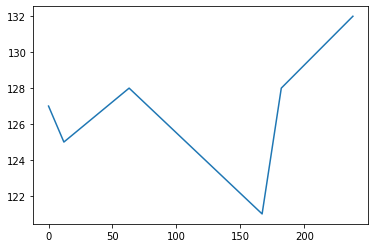

In [46]:
import json
from matplotlib import pyplot as plt

with open("../dataset/beach.ndjson") as f:
    data = f.readlines()
    
plt.plot(*json.loads(data[0].strip())["drawing"][0])
plt.show()

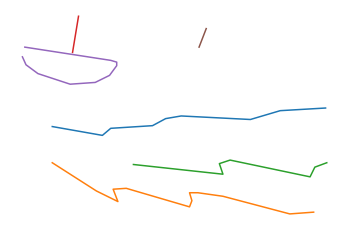

In [67]:
#def draw_points

def draw_example(data, i):
    elems = json.loads(data[i].strip())["drawing"]
    for k in range(len(elems)):
        plt.plot(*elems[k])
    plt.axis('off')
    #plt.show()
    plt.savefig("./ab.jpg")
    

draw_example(data, 11)

In [63]:
os.listdir(".")

['plt_x.svg',
 'plt.svg',
 'Sampling points from an image.ipynb',
 'ab.jpg',
 'half_face.svg',
 'Play with Delaunay triangles and random points.ipynb',
 'plt_gauss.svg',
 'Playing with quick draw.ipynb',
 '.ipynb_checkpoints',
 'plt_3.svg',
 'plt_2.svg',
 'face_delaunay.svg',
 'plt_poisson.svg']

In [64]:
os.listdir("..")

['.DS_Store', 'dataset', 'axi', 'AxiDraw_API_v256', 'notebooks']

In [66]:
with open("poppo", "w") as g:
    g.write("popo")